In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# In this we are only going to find the value for B only
We are going to find only 1 data
This is the half gradient descent

y=mx1+b
We will assume that m is already given we need to find the values of B using Gradient descent

In [20]:
# Creating own dataset
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
X,y=make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)
print(X.shape)
print(y.shape)

(4, 1)
(4,)


In [22]:
x = X.ravel()
x

array([-0.71239066,  0.45181234, -0.04450308,  0.75376638])

In [23]:
df=pd.DataFrame(
    {
        "Feature1":x,
         "Target":y
    }
)
df

,Feature1,Target
0,-0.712391,7.217866
1,0.451812,16.046099
2,-0.044503,-27.837562
3,0.753766,144.366882


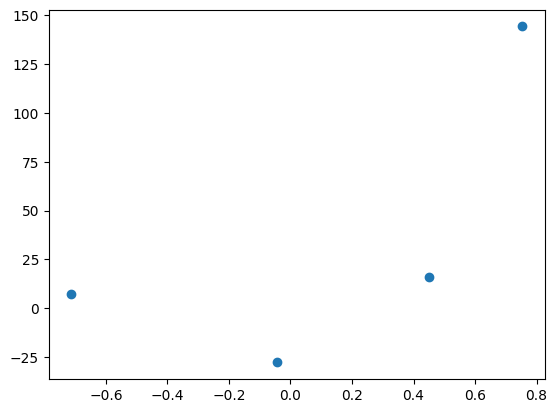

In [24]:
plt.scatter(X,y)
plt.show()

In [25]:
# Creating Linear Regression Class
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [26]:
# type(lr)

In [27]:
reg_pred=reg.predict(X)
reg_pred

array([-29.65662909,  61.55941724,  22.67278832,  85.21770852])

In [28]:
print("m",reg.coef_)
print("b",reg.intercept_)

m [78.35063668]
b 26.15963284313262


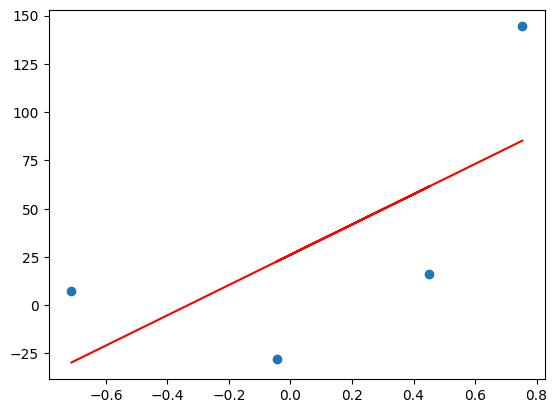

In [29]:
# Drawing best fit line
plt.scatter(X,y)
plt.plot(X,reg_pred,color="red")

### Lets apply Gradient Descent assuming slope is constant m = 78.35
### and let's assume the starting value for intercept b = 0

# $\hat{Y}$=mx+b
# error = $\sum_{i=1}^{n} (Yi-\hat{Yi})^2$ 
# b_new = b_old-n*slope    , n = learning rate
# slope = -2$\sum_{i=1}^{n} (Yi-mxi-b)$

In [30]:
# Random B= 100
y_pred = ((78.35*X)+100).reshape(4)
y_pred

array([ 44.18419163, 135.39949674,  96.51318381, 159.05759577])

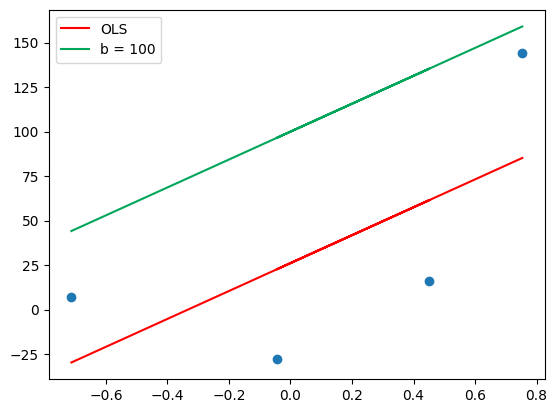

In [31]:
# Drawing best fit line

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b = 100')
plt.legend()
plt.show()

In [32]:
# Iternation 1
m = 78.35
b = 100
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

np.float64(590.7223659179078)

In [33]:

# Lets take learning rate = 0.1
lr = 0.1

step_size=loss_slope *lr

print("Step_size",step_size)

b1_new = b - step_size
b1_new

Step_size 59.072236591790784


np.float64(40.927763408209216)

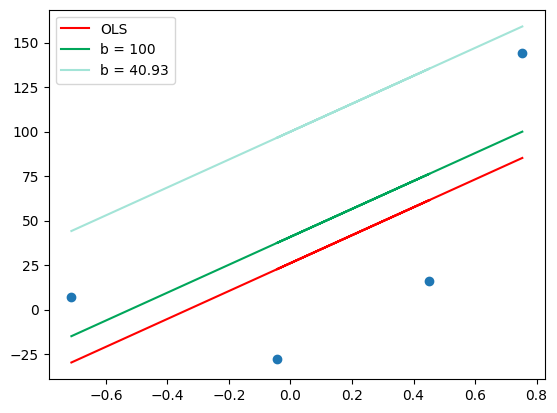

In [34]:

y_pred1 = ((78.35 * X) + b1_new).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label=f'b = {b1_new.round(2)}')
plt.legend()
plt.show()

In [35]:
# Iternation 1
loss_slope_2 = -2 * np.sum(y - m*X.ravel() - b1_new)
loss_slope_2

np.float64(118.14447318358157)

In [36]:
lr = 0.1

step_size_2= lr*loss_slope_2

b2_new = b1_new-step_size_2
b2_new

np.float64(29.11331608985106)

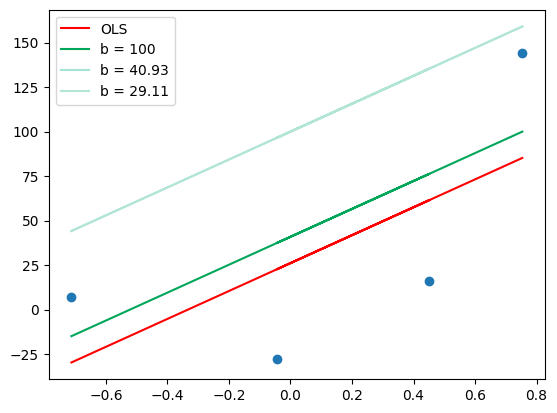

In [37]:
y_pred2 = ((78.35 * X) + b2_new).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label=f'b = {b1_new.round(2)}')
plt.plot(X,y_pred,color='#B3E5D7',label=f'b = {b2_new.round(2)}')
plt.legend()
plt.show()

In [38]:
# Iteratoin 3
loss_slope_3 = -2 * np.sum(y - m*X.ravel() - b2_new)
loss_slope_3

step_size_3= lr*loss_slope_3

b3_new = b2_new-step_size_3
b3_new

np.float64(26.750426626179426)

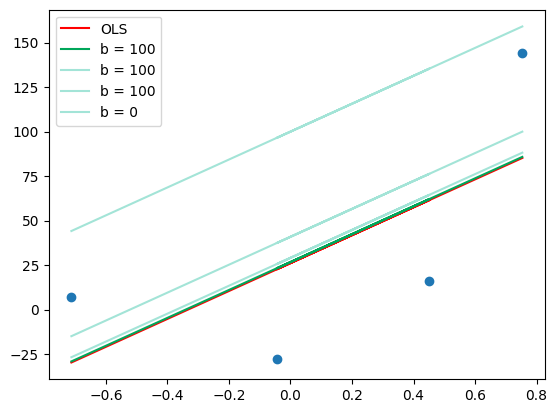

In [40]:
y_pred3 = ((78.35 * X) + b3_new).reshape(4)

# plt.figure(figsize=(15,15))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

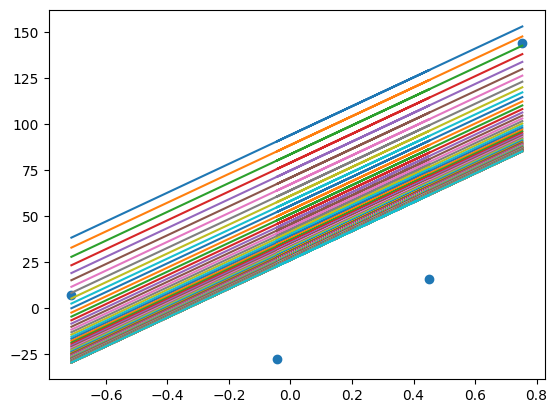

In [41]:
b=100
m= 78.35
lr=0.01

epochs= 100

for i in range(epochs):
    loss_slope = -2 *np.sum(y-m*X.ravel()-b)
    b=b-(lr*loss_slope)
    y_pred=m*X+b

    plt.plot(X,y_pred)
plt.scatter(X,y)